## Running Psi4 to populate the OpenFermion MolecularData class

The module run_psi4.py provides a user-friendly way of running Psi4 calculations in OpenFermion. The basic idea is that once one generates a MolecularData instance, one can then call Psi4 with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in OpenFermion would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. 
Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated Psi4 input files or not.

To use this plugin, you will need to personally download Psi4. Python code in psi4_template instructs Psi4 (not python) to load the MolecularData object, populate it with information from calculations and then save the MolecularData object as an HDF5. The module run_psi4 uses subprocess to actually run_psi4 and then loads the pickled MolecularData. Let us look at a simple example where we compute the energy of H$_2$ at various bond lengths.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. If a particular calculation is not converging it is probably necessary to change some of the SCF options set in psi4_template. See the Psi4 documentation for more information or consult and electronic structure theory expert.


At bond length of 0.2 angstrom, molecular hydrogen has:
Hartree-Fock energy of 0.1641750014148149 Hartree.
MP2 energy of 0.159042663260535 Hartree.
FCI energy of 0.15748212414246954 Hartree.
Nuclear repulsion energy between protons is 2.64588604295 Hartree.
Spatial orbital 0 has energy of -0.8588245273148681 Hartree.
Spatial orbital 1 has energy of 1.5723620302922923 Hartree.

At bond length of 0.4 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.9043613977138452 Hartree.
MP2 energy of -0.9114367296997886 Hartree.
FCI energy of -0.9141497082141279 Hartree.
Nuclear repulsion energy between protons is 1.322943021475 Hartree.
Spatial orbital 0 has energy of -0.745212533290935 Hartree.
Spatial orbital 1 has energy of 1.1674163950381238 Hartree.

At bond length of 0.6000000000000001 angstrom, molecular hydrogen has:
Hartree-Fock energy of -1.1011282431368283 Hartree.
MP2 energy of -1.111331767479406 Hartree.
FCI energy of -1.1162860078265333 Hartree.
Nuclear repulsion energy bet

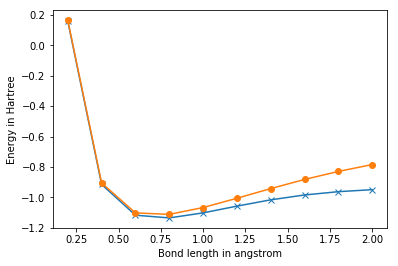

In [ ]:
from openfermion.hamiltonians import MolecularData
from openfermionpsi4 import run_psi4

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.2
n_points = 10

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4.
    molecule = run_psi4(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} angstrom, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()

In [1]:
# Extract MolecularData geometry of methane from PubChem
from openfermionpsi4 import geometry_from_pubchem
name = 'methane'
methane_geometry = geometry_from_pubchem('methane')
print(methane_geometry)

[('C', (0, 0, 0)), ('H', (0.5541, 0.7996, 0.4965)), ('H', (0.6833, -0.8134, -0.2536)), ('H', (-0.7782, -0.3735, 0.6692)), ('H', (-0.4593, 0.3874, -0.9121))]
